In [2]:
%matplotlib inline

In [64]:
import random
import time

import retro
import gym

import torch
import torch.nn as nn
import torch.nn.functional as F

from skimage import transform
from skimage.color import rgb2gray

from matplotlib import pyplot as plt
from IPython import display

In [99]:
MEMORY_SIZE = 100000

In [4]:
class ReplayBuffer():
    
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.push_count = 0
        
    def push(self, state, action, next_state, reward, done):
        ''' 
        Adds an experience to the memory.

        If the current push_count exceeeds the
        capacity then we will start replacing
        the memory starting from the oldest experiences.

        experience tuple - (state, action, next_state, reward, done)
        '''
        experience = (state, action, next_state, reward, done)
        if self.push_count < self.capacity:
            self.memory.append(experience)
        else:
            self.memory[self.push_count % self.capacity] = experience
        self.push_count += 1

    def sample(self, batch_size):
        ''' 
        Returns a randomly selected batch from
        the memory list.

        If the batch size is larger than the memory
        size, None is returned
        '''
        try:
            return random.sample(self.memory, batch_size)
        except ValueError:
            return None

In [97]:
class Env():
    
    def __init__(self, device, env_name='PongDeterministic-v4'):
        '''
        Initialize Env object.
        
        Args:
            env_name: name of Gym environment
            device: PyTorch device for computations
        '''
        self.env = gym.make(env_name)
        self.done = False
        self.reset()
        self.device = device
        
        self.num_actions = self.env.action_space.n

    def play_action(self, action):
        '''
        Executes given action in the environment.
        
        Args:
            action: index of action to execute
        Returns:
            
        '''
        return

    @staticmethod
    def state_to_tensor(state):
        '''
        Processes state to PyTorch tensor, delegating to preprocess_state().
        
        Args:
            state: RGB array from rendered environment
        Returns:
            84 x 84 PyTorch tensor
        '''
        state = Env.preprocess_state(state)
        state = torch.tensor(state, dtype=torch.float64)
        return state

    @staticmethod
    def preprocess_state(state, RESIZE_HEIGHT=84, RESIZE_WIDTH=84):
        '''
        Converts state to Grayscale, crops top/bottom, and resizes
        
        Args:
            state: RGB array from rendered environment
        Returns:
            84 x 84 numpy array
        '''
        state = rgb2gray(state)
        state = state[20:-5]
        state = transform.resize(state, [RESIZE_HEIGHT, RESIZE_WIDTH])
        return state

    def reset(self):
        '''
        Resets the environment.
        '''
        self.done = False
        self.env.reset()
        self.state = self.render(mode='rgb_array')
        self.state = Env.state_to_tensor(self.state)

    def render(self, mode='human'):
        '''
        Renders environment.
        
        Args:
            mode: type of rendering (human or rgb_array)
        '''
        return self.env.render(mode)
    
    def show_state(self):
        plt.imshow(self.state.numpy(), cmap='gray')
        plt.show()
        
    def close(self):
        '''
        Closes the environment.
        '''
        self.env.close()

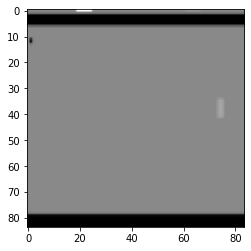

In [100]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
memory = ReplayBuffer(MEMORY_SIZE)

env = Env(device, 'PongDeterministic-v4')

env.show_state()

'''
for i in range(30):
    env.step(random.randrange(2,4))
    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.001)
'''
    
env.close()